In [177]:
import numpy as np
import pandas as pd

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

In [179]:
# importing MinMaxScaler for rescalling 
from sklearn.preprocessing import MinMaxScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Importing RFE and LinearRegression 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [180]:
# Importing statsmodels of OLS
import statsmodels.api as sm  

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [181]:
import warnings
warnings.filterwarnings('ignore')

In [182]:
bike_data = pd.read_csv('day.csv')

In [183]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [184]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [185]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [186]:
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [187]:
bike_data.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,01-01-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.500000,NaN,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,NaN,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000


In [188]:
bike_data.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,01-01-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.500000,NaN,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,NaN,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000


In [189]:
bike_data.shape

(730, 16)

In [190]:
# instant columns contains index values only, not requried
bike_data.drop(['instant', 'dteday', 'casual','registered'],axis=1,inplace=True)

In [191]:
bike_data.shape # only 12 columns remaining after drop operation

(730, 12)

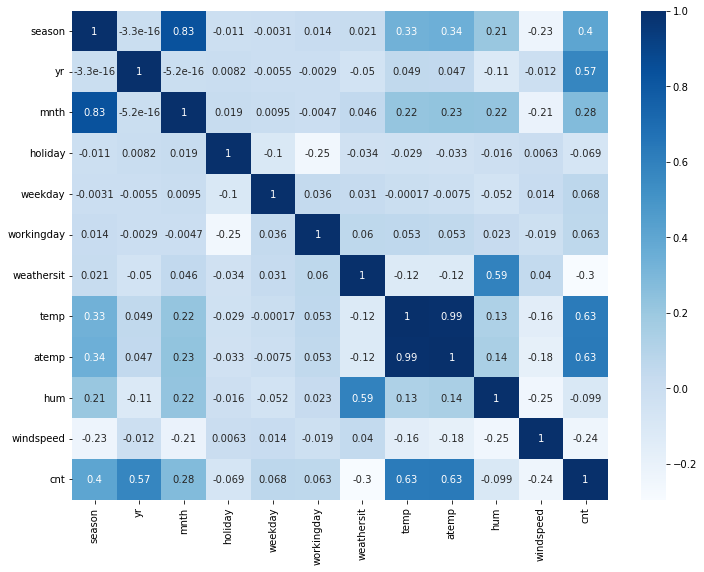

In [192]:
# Heat Map

plt.figure(figsize = (12, 9))
sns.heatmap(bike_data.corr(), annot=True, cmap="Blues")
plt.show()


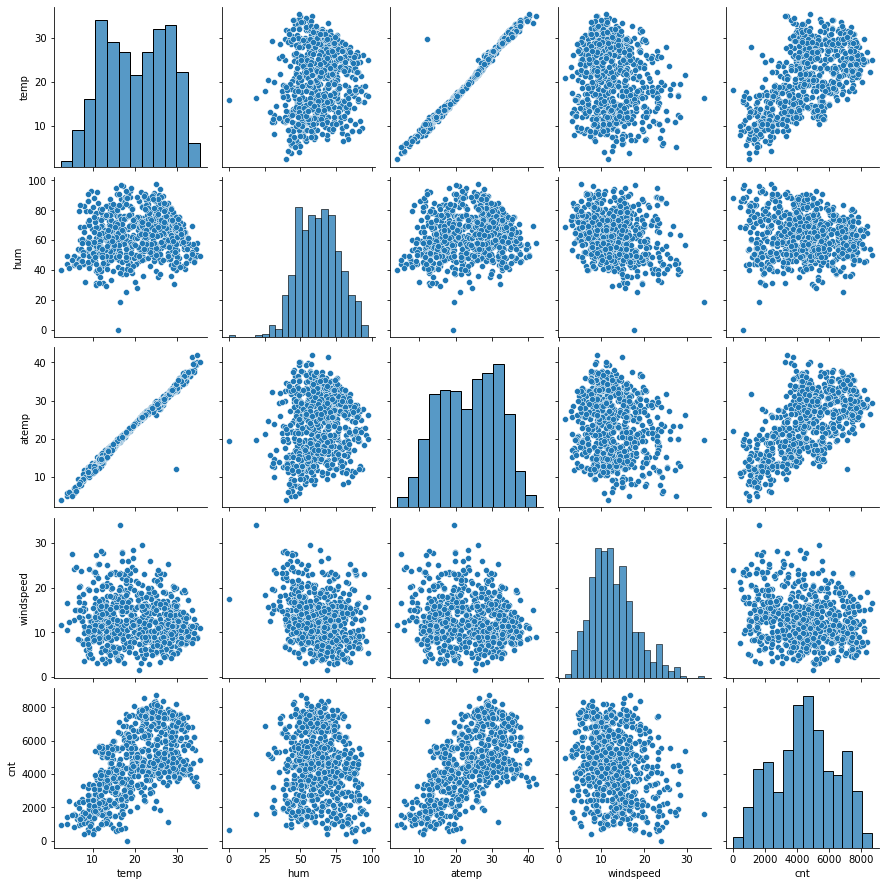

In [193]:
# Pairplot of numerical variables

sns.pairplot(bike_data, vars=['temp','hum','atemp','windspeed',"cnt"])
plt.show()

In [194]:
# Creating DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.
# Convert to 'object' data type

bike_data['season']=bike_data['season'].astype('category')
bike_data['weathersit']=bike_data['weathersit'].astype('category')
bike_data['mnth']=bike_data['mnth'].astype('category')
bike_data['weekday']=bike_data['weekday'].astype('category')

In [195]:
bike_data.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [196]:
bike_data.describe(include='category')

,season,mnth,weekday,weathersit
count,730,730,730,730
unique,4,12,7,3
top,3,1,0,1
freq,188,62,105,463


In [197]:
# creating dummy variables for 'mnth', 'weekday', 'season' & 'weathersit'
# dropping 1st dummy variable for each
# dropping the original columns

bike_data=pd.get_dummies(data=bike_data,drop_first=True)

bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [198]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [199]:
bike_data.shape

(730, 30)

In [200]:
np.random.seed(0)
df_train,df_test=train_test_split(bike_data,train_size=0.7,test_size=0.3,random_state=1000)

In [201]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [202]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
544,1,0,1,34.200847,39.33065,48.8750,11.082939,5463,0,1,...,0,0,0,0,0,0,1,0,0,0
674,1,0,1,11.514153,14.07835,56.7083,11.625371,5686,0,0,...,1,0,0,1,0,0,0,0,0,0
477,1,0,1,13.188347,15.05625,76.6667,20.334232,3214,1,0,...,0,0,1,0,0,0,0,0,1,0
176,0,0,0,27.880000,31.88145,51.3333,6.333731,5305,0,1,...,0,0,0,0,0,0,0,0,0,0
655,1,0,1,21.422500,25.63125,72.8333,15.874779,7509,0,0,...,0,0,0,0,0,1,0,0,1,0


In [203]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 544 to 599
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [204]:
df_test.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
310,0,0,1,16.195000,20.04355,75.8750,3.834075,4035,0,0,...,1,0,1,0,0,0,0,0,0,0
320,0,0,1,14.008347,16.16105,57.5833,20.459254,3053,0,0,...,1,0,0,0,0,1,0,0,1,0
189,0,0,0,30.066653,33.20790,60.9167,11.250104,5336,0,1,...,0,0,0,0,0,0,0,1,0,0
382,1,0,1,12.436653,13.76270,44.3333,27.833743,3376,0,0,...,0,0,0,0,1,0,0,0,0,0
388,1,0,1,14.042500,17.45540,83.5833,8.292389,4339,0,0,...,0,0,0,1,0,0,0,0,0,0


In [205]:
scaler = MinMaxScaler()

In [206]:
# Apply scaler() to all numeric variables except the 'dummy' variables
numv=['atemp', 'hum','temp','windspeed','cnt']

df_train[numv]=scaler.fit_transform(df_train[numv])
df_test[numv]=scaler.transform(df_test[numv])


In [207]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
544,1,0,1,0.964059,0.926848,0.503649,0.294854,0.625978,0,1,...,0,0,0,0,0,0,1,0,0,0
674,1,0,1,0.240884,0.246245,0.584370,0.311545,0.651634,0,0,...,1,0,0,1,0,0,0,0,0,0
477,1,0,1,0.294252,0.272602,0.790039,0.579511,0.367234,1,0,...,0,0,1,0,0,0,0,0,1,0
176,0,0,0,0.762572,0.726076,0.528982,0.148724,0.607800,0,1,...,0,0,0,0,0,0,0,0,0,0
655,1,0,1,0.556729,0.557620,0.750536,0.442296,0.861367,0,0,...,0,0,0,0,0,1,0,0,1,0


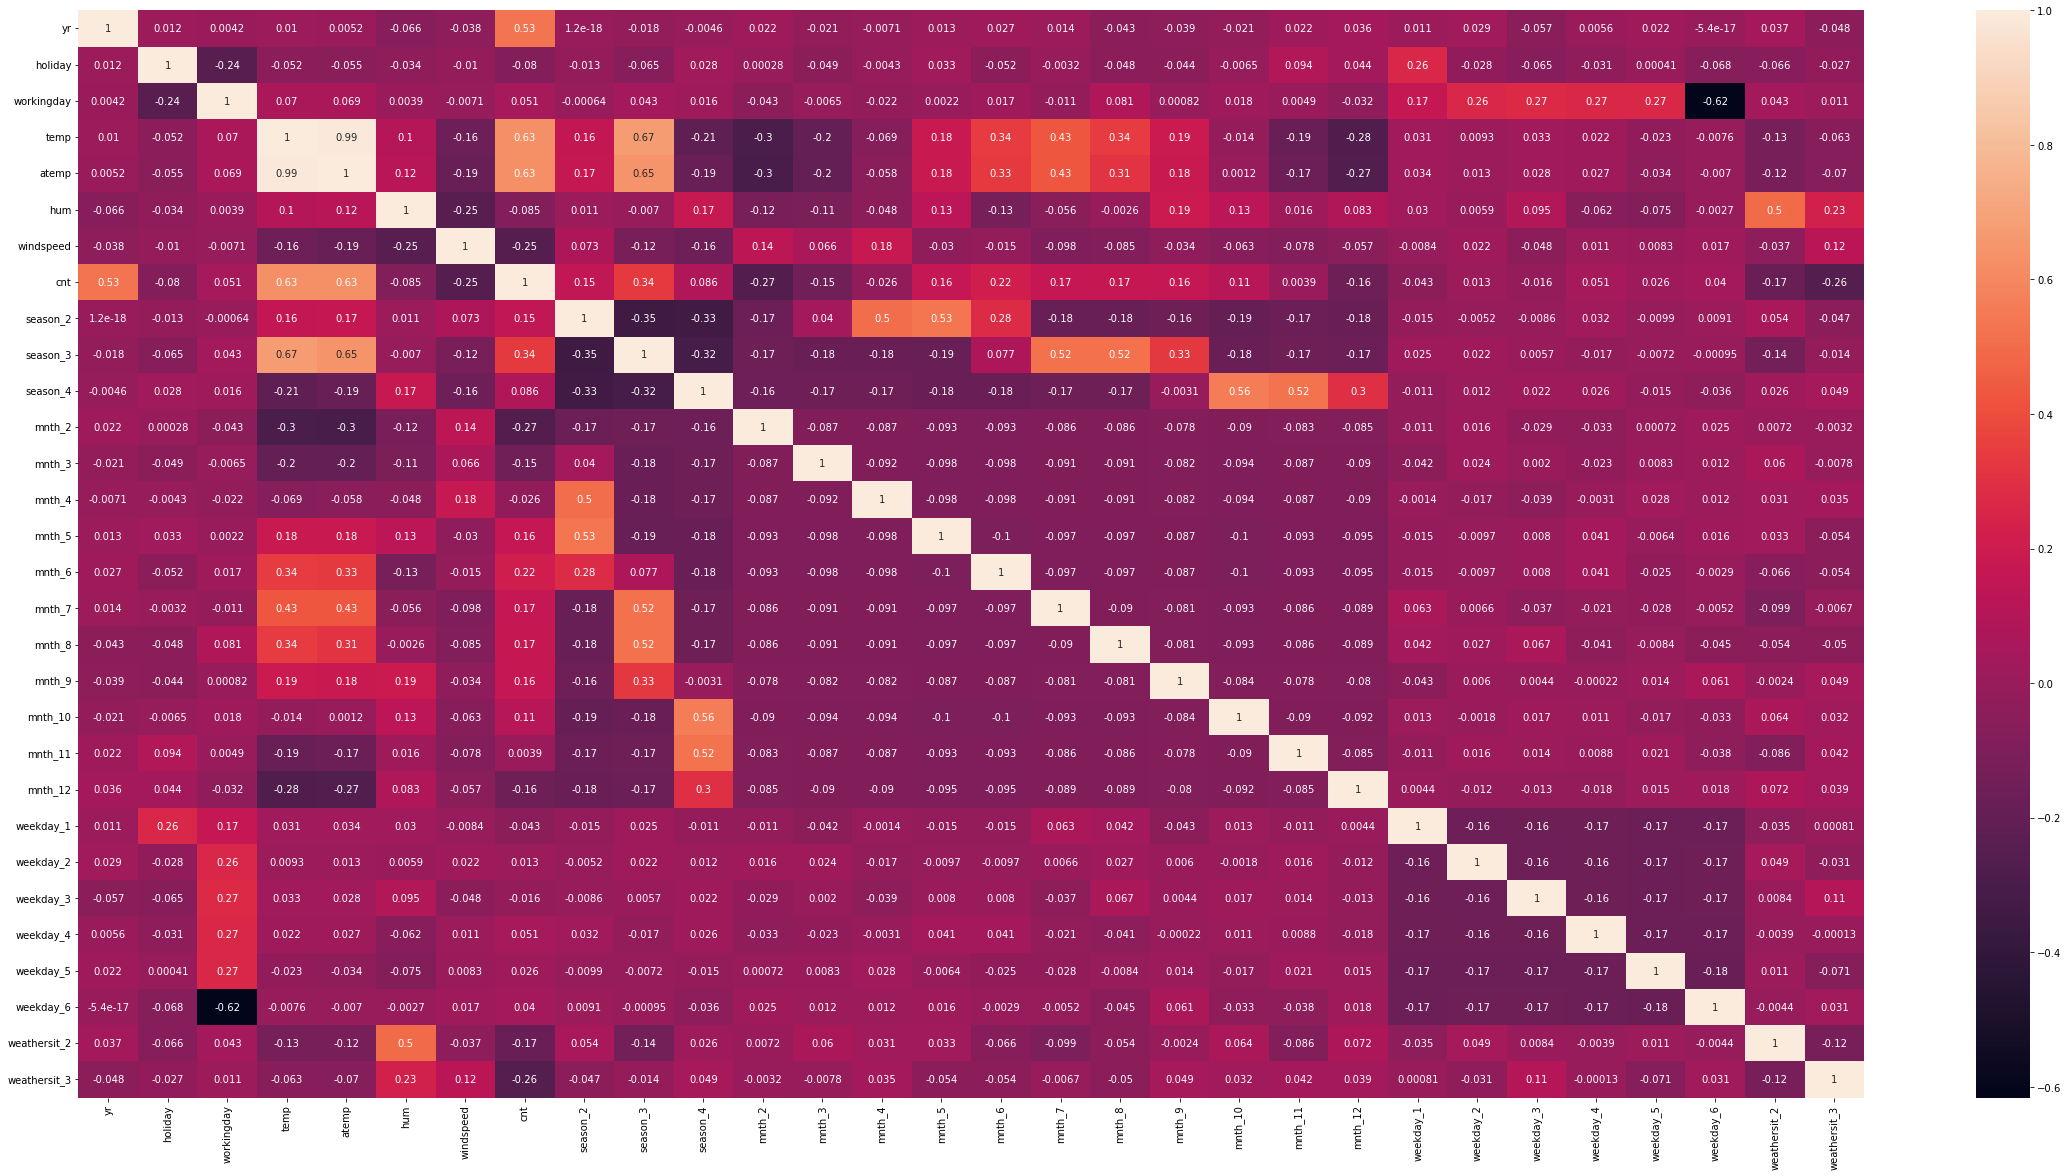

In [208]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(40, 20))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

In [209]:
y_train = df_train.pop('cnt')
X_train = df_train

In [210]:
y_test = df_test.pop('cnt')
X_test = df_test

In [211]:
X_train.shape

(510, 29)

In [212]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [213]:
rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [214]:
ranking_lst = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
ranking_lst

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('atemp', False, 15),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 8),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', False, 11),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 10),
 ('mnth_12', False, 5),
 ('weekday_1', False, 6),
 ('weekday_2', False, 9),
 ('weekday_3', False, 14),
 ('weekday_4', False, 12),
 ('weekday_5', False, 13),
 ('weekday_6', False, 4),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [215]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [216]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [217]:
# Creating dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [218]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,20.80
3,hum,15.17
6,season_3,8.14
4,windspeed,4.35
5,season_2,4.06
7,season_4,3.12
13,weathersit_2,2.21
0,yr,1.95
12,mnth_10,1.73
9,mnth_5,1.67


In [219]:
# Adding a constant variable 
X_train_lm1 = sm.add_constant(X_train_rfe)

In [220]:
# Running the linear model
lr1=sm.OLS(y_train,X_train_lm1).fit()

In [221]:
#Let's see the summary of our linear model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     168.2
Date:                Wed, 20 Jul 2022   Prob (F-statistic):          5.08e-183
Time:                        23:38:57   Log-Likelihood:                 510.44
No. Observations:                 510   AIC:                            -988.9
Df Residuals:                     494   BIC:                            -921.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2581      0.029      8.902   

In [222]:
X_train_rfe2 = X_train_rfe.drop(["temp"], axis = 1)

In [223]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe2.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,11.33
3,windspeed,4.28
5,season_3,3.17
6,season_4,2.90
4,season_2,2.57
12,weathersit_2,2.08
0,yr,1.92
9,mnth_8,1.66
11,mnth_10,1.64
8,mnth_5,1.63


In [224]:
# Adding a constant variable 
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Running the linear model
lr2=sm.OLS(y_train,X_train_lm2).fit()

#Let's see the summary of our linear model
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     120.7
Date:                Wed, 20 Jul 2022   Prob (F-statistic):          1.95e-149
Time:                        23:38:58   Log-Likelihood:                 427.59
No. Observations:                 510   AIC:                            -825.2
Df Residuals:                     495   BIC:                            -761.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3320      0.033      9.915   

In [225]:
X_train_rfe3=X_train_rfe2.drop(['season_3'],axis=1)

In [226]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif=pd.DataFrame()
vif['Features']=X_train_rfe3.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe3.values,i) for i in range(X_train_rfe3.shape[1])]
vif['VIF']=round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,8.94
3,windspeed,4.28
5,season_4,2.32
4,season_2,2.25
11,weathersit_2,1.96
0,yr,1.91
10,mnth_10,1.64
7,mnth_5,1.62
8,mnth_8,1.28
9,mnth_9,1.22


In [227]:
# Adding a constant
X_train_lm3=sm.add_constant(X_train_rfe3)

# Running the linear model
lr3=sm.OLS(y_train,X_train_lm3).fit()

# Summary
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     63.78
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           6.15e-97
Time:                        23:38:58   Log-Likelihood:                 299.58
No. Observations:                 510   AIC:                            -571.2
Df Residuals:                     496   BIC:                            -511.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4714      0.042     11.269   

In [228]:
X_train_rfe4=X_train_rfe3.drop(['hum'],axis=1)

In [229]:
X_train_rfe4.columns

Index(['yr', 'holiday', 'windspeed', 'season_2', 'season_4', 'mnth_3',
       'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [230]:
# Checking VIF

vif=pd.DataFrame()
vif['Features']=X_train_rfe4.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe4.values,i) for i in range(X_train_rfe4.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,yr,1.77
1,holiday,1.04
2,windspeed,2.68
3,season_2,2.11
4,season_4,1.95
5,mnth_3,1.16
6,mnth_5,1.58
7,mnth_8,1.12
8,mnth_9,1.10
9,mnth_10,1.64


In [231]:
# Adding a constant
X_train_lm4=sm.add_constant(X_train_rfe4)

# Running the linear model
lr4=sm.OLS(y_train,X_train_lm4).fit()

# Summary
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     68.82
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           1.80e-97
Time:                        23:38:58   Log-Likelihood:                 298.64
No. Observations:                 510   AIC:                            -571.3
Df Residuals:                     497   BIC:                            -516.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4212      0.020     21.441   

In [232]:
X_train_rfe5=X_train_rfe4.drop(['windspeed'],axis=1)

In [233]:
X_train_rfe5.columns

Index(['yr', 'holiday', 'season_2', 'season_4', 'mnth_3', 'mnth_5', 'mnth_8',
       'mnth_9', 'mnth_10', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [234]:
# Checking VIF

vif=pd.DataFrame()
vif['Features']=X_train_rfe5.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe5.values,i) for i in range(X_train_rfe5.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,yr,1.53
1,holiday,1.03
2,season_2,1.85
3,season_4,1.87
4,mnth_3,1.11
5,mnth_5,1.58
6,mnth_8,1.06
7,mnth_9,1.07
8,mnth_10,1.63
9,weathersit_2,1.44


In [235]:
# Adding a constant
X_train_lm5=sm.add_constant(X_train_rfe5)

# Running the linear model
lr4=sm.OLS(y_train,X_train_lm5).fit()

# Summary
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     67.74
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           1.46e-91
Time:                        23:38:58   Log-Likelihood:                 282.28
No. Observations:                 510   AIC:                            -540.6
Df Residuals:                     498   BIC:                            -489.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3371      0.013     24.978   

In [236]:
X_train_rfe5.columns


Index(['yr', 'holiday', 'season_2', 'season_4', 'mnth_3', 'mnth_5', 'mnth_8',
       'mnth_9', 'mnth_10', 'weathersit_2', 'weathersit_3'],
      dtype='object')